## Handwritten Digit Recognition Using Pytorch

In [1]:
import torch
import torchvision
from torchvision import transforms,datasets

In [2]:
train=datasets.MNIST("", train=True, download=True,
                    transform=transforms.Compose([transforms.ToTensor()]))

test=datasets.MNIST("", train=False, download=True,
                    transform=transforms.Compose([transforms.ToTensor()]))

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
trainset= torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [4]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
x,y= data[0][0], data[1][0]
print(y)

tensor(9)


In [6]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


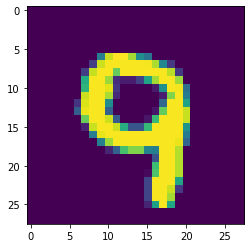

In [7]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view([28,28]))
plt.show()

In [8]:
import torch.nn as nn       # nn is like Object
import torch.nn.functional as F     # F is like function

In [9]:
class Net(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(28*28, 64)
    self.fc2=nn.Linear(64, 64)
    self.fc3=nn.Linear(64, 64)
    self.fc4=nn.Linear(64, 10)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=self.fc4(x)
    return F.log_softmax(x, dim=1)

net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [10]:
X=torch.rand((28*28))
X=X.view(-1,28*28)
output=net(X)
print(output)

tensor([[-2.2312, -2.2085, -2.3179, -2.3374, -2.3266, -2.2285, -2.3030, -2.2271,
         -2.3912, -2.4885]], grad_fn=<LogSoftmaxBackward>)


In [11]:
import torch.optim as optim

optimizer=optim.Adam(net.parameters(),lr=0.001) #l=e3


EPOCHS=3

for epoch in range(EPOCHS):

  for data in trainset:
    #data is a batch of feature sets and labels
    X,y=data
    net.zero_grad()
    output=net(X.view(-1,28*28))
    loss=F.nll_loss(output,y)
    loss.backward()
    optimizer.step()

  print(loss)

tensor(0.0186, grad_fn=<NllLossBackward>)
tensor(0.0735, grad_fn=<NllLossBackward>)
tensor(0.7735, grad_fn=<NllLossBackward>)


In [12]:
correct=0
total=0

with torch.no_grad():
  for data in trainset:
    X,y=data
    output=net(X.view(-1,784))
    for idx, i in enumerate(output):
      if torch.argmax(i)==y[idx]:
        correct+=1
      total+=1
  
print("Accuracy : ", round(correct/total,3))

Accuracy :  0.972


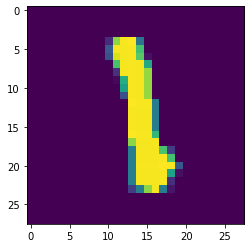

In [13]:
plt.imshow(X[0].view(28,28))
plt.show()

In [14]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(1)
